Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [6]:
library('tidymodels')
library('tidyr')
library('dplyr')

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [7]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [8]:
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 3, 1, 13, 5, 10, 4, 3, 7, 7, 7, …
$ Glucose                  <dbl> 85, 89, 116, 115, 126, 97, 145, 117, 122, 103…
$ BloodPressure            <dbl> 66, 66, 74, 0, 88, 66, 82, 92, 78, 60, 64, 84…
$ SkinThickness            <dbl> 29, 23, 0, 0, 41, 15, 19, 0, 31, 33, 25, 0, 1…
$ Insulin                  <dbl> 0, 94, 0, 0, 235, 140, 110, 0, 0, 192, 70, 0,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 39.3, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.704, 0.487, 0.2…
$ Age                      <dbl> 31, 21, 30, 29, 27, 22, 57, 38, 45, 33, 26, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In logistic regression it makes sense for it to be outcome, as it is a categorical variable with a binary classification

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :----------|
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

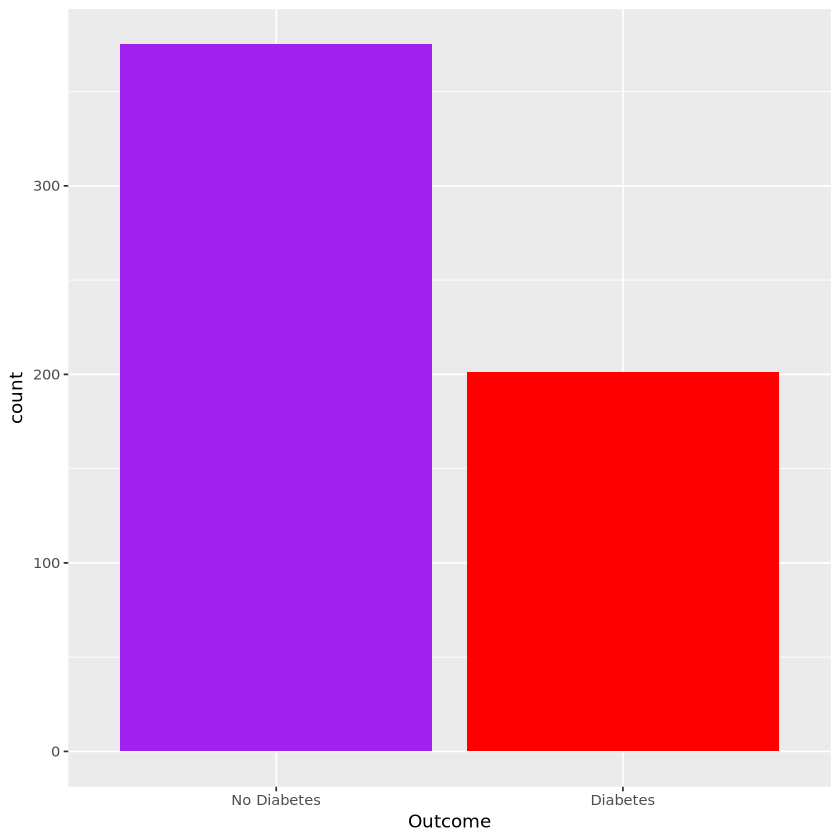

In [13]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(stat = "count", fill = c("purple", "red")) +
  scale_x_discrete(labels = c("No Diabetes", "Diabetes"))

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

It is not; there are roughly more 175 more counts of individuals with no diabetes versus having diabetes



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [14]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

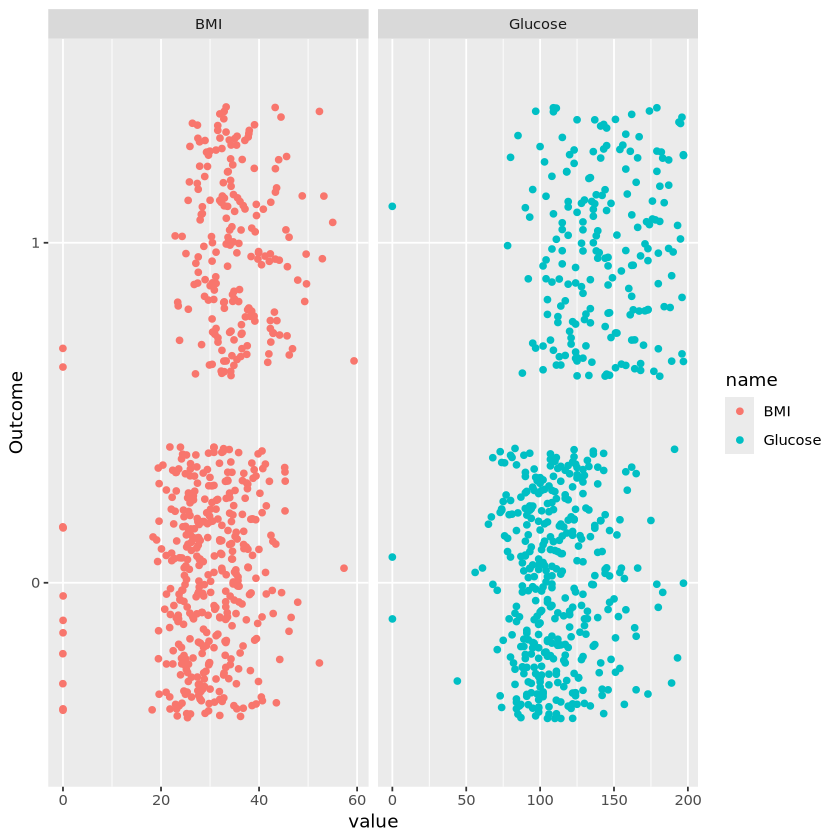

In [25]:
ggplot(plot_df, aes(x = value, y = Outcome, color = name)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In [ ]:
When scales= 'free_x' is removed, all of the charts have to share the same limits of the x axis. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [27]:
my_model <- logistic_reg() |> set_engine('glm')

model_fit <- my_model |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(model_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.45691204,0.682017749,-10.933604,7.962191e-28
BMI,0.07545649,0.015304130,4.930466,8.203385e-07
Glucose,0.03497420,0.003828508,9.135202,6.528463e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [29]:
diabetes_test_wPred <- augment(mod_fit, diabetes_test)
head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.3314792,0.6685208,8,183,64,0,0,23.3,0.672,32,1
0,0.6840801,0.3159199,4,110,92,0,0,37.6,0.191,30,0
0,0.6342812,0.3657188,10,139,80,0,0,27.1,1.441,57,0
1,0.1939646,0.8060354,1,189,60,23,846,30.1,0.398,59,1
0,0.8449851,0.1550149,7,100,0,0,0,30.0,0.484,32,1
0,0.8147478,0.1852522,7,107,74,0,0,29.6,0.254,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [31]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 115  34
         1  10  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. There were 67 individuals with diabetes 
2. There were 33 individuals predicted to have diabetes
3. 10 were predicted to have diabetes but did not. 